## Weapon Detection using ML YOLOv5 and SURF algorithms

In [ ]:
"""
Required dependency libraries to be installed
-pip install opencv-python
-pip install numpy 
-pip install tensorflow or pip install torch  
-pip install labelimg
-pip install yolov5 



OR use:
-pip install -r /content/YOLOv6/requirements.txt
"""

### 1. Import required libraries 

In [ ]:
import os
import re
import cv2
import torch
import yolov5
import subprocess
import numpy as np
from pathlib import Path
from models.experimental import attempt_load
from IPython.display import Image # To render predictions

: 

### 2. Train the Model using YOLOv5

In [3]:
# Train the model using PyTorch framework which uses CNN-DNN 
#!python yolov5/train.py --img 415 --batch 16 --epochs 5 --data dataset.yaml --weights yolov5s.pt --cache
!python yolov5/train.py --data dataset.yaml --epochs 3 --weights '' --cfg yolov5s.yaml  --batch-size 16

Expected package name at the start of dependency specifier
    n u m p y = = 1 . 2 4 . 3 
    ^


train: weights='', cfg=yolov5s.yaml, data=dataset.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5\runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
   867f7f0..c3e4e94  master     -> origin/master
github:  YOLOv5 is out of date by 7 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-155-g8ecc727 Python-3.9.7 torch-2.0.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmu

### 3. Test the trained YOLOv5 Weapon Detection Model

In [4]:
# Test specific image using the trained YOLOv5 model
!python yolov5/detect.py --source D:/AI/weapon_detection/dataset/test/terrorists2.jpg --weights D:/AI/weapon_detection/yolov5/runs/train/exp10/weights/best.pt

Expected package name at the start of dependency specifier
    n u m p y = = 1 . 2 4 . 3 
    ^


detect: weights=['D:/AI/weapon_detection/yolov5/runs/train/exp10/weights/best.pt'], source=D:/AI/weapon_detection/dataset/test/terrorists2.jpg, data=yolov5\data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-155-g8ecc727 Python-3.9.7 torch-2.0.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 D:\AI\weapon_detection\dataset\test\terrorists2.jpg: 384x640 (no detections), 373.5ms
Speed: 2.0ms pre-process, 373.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5\runs\detect\exp10


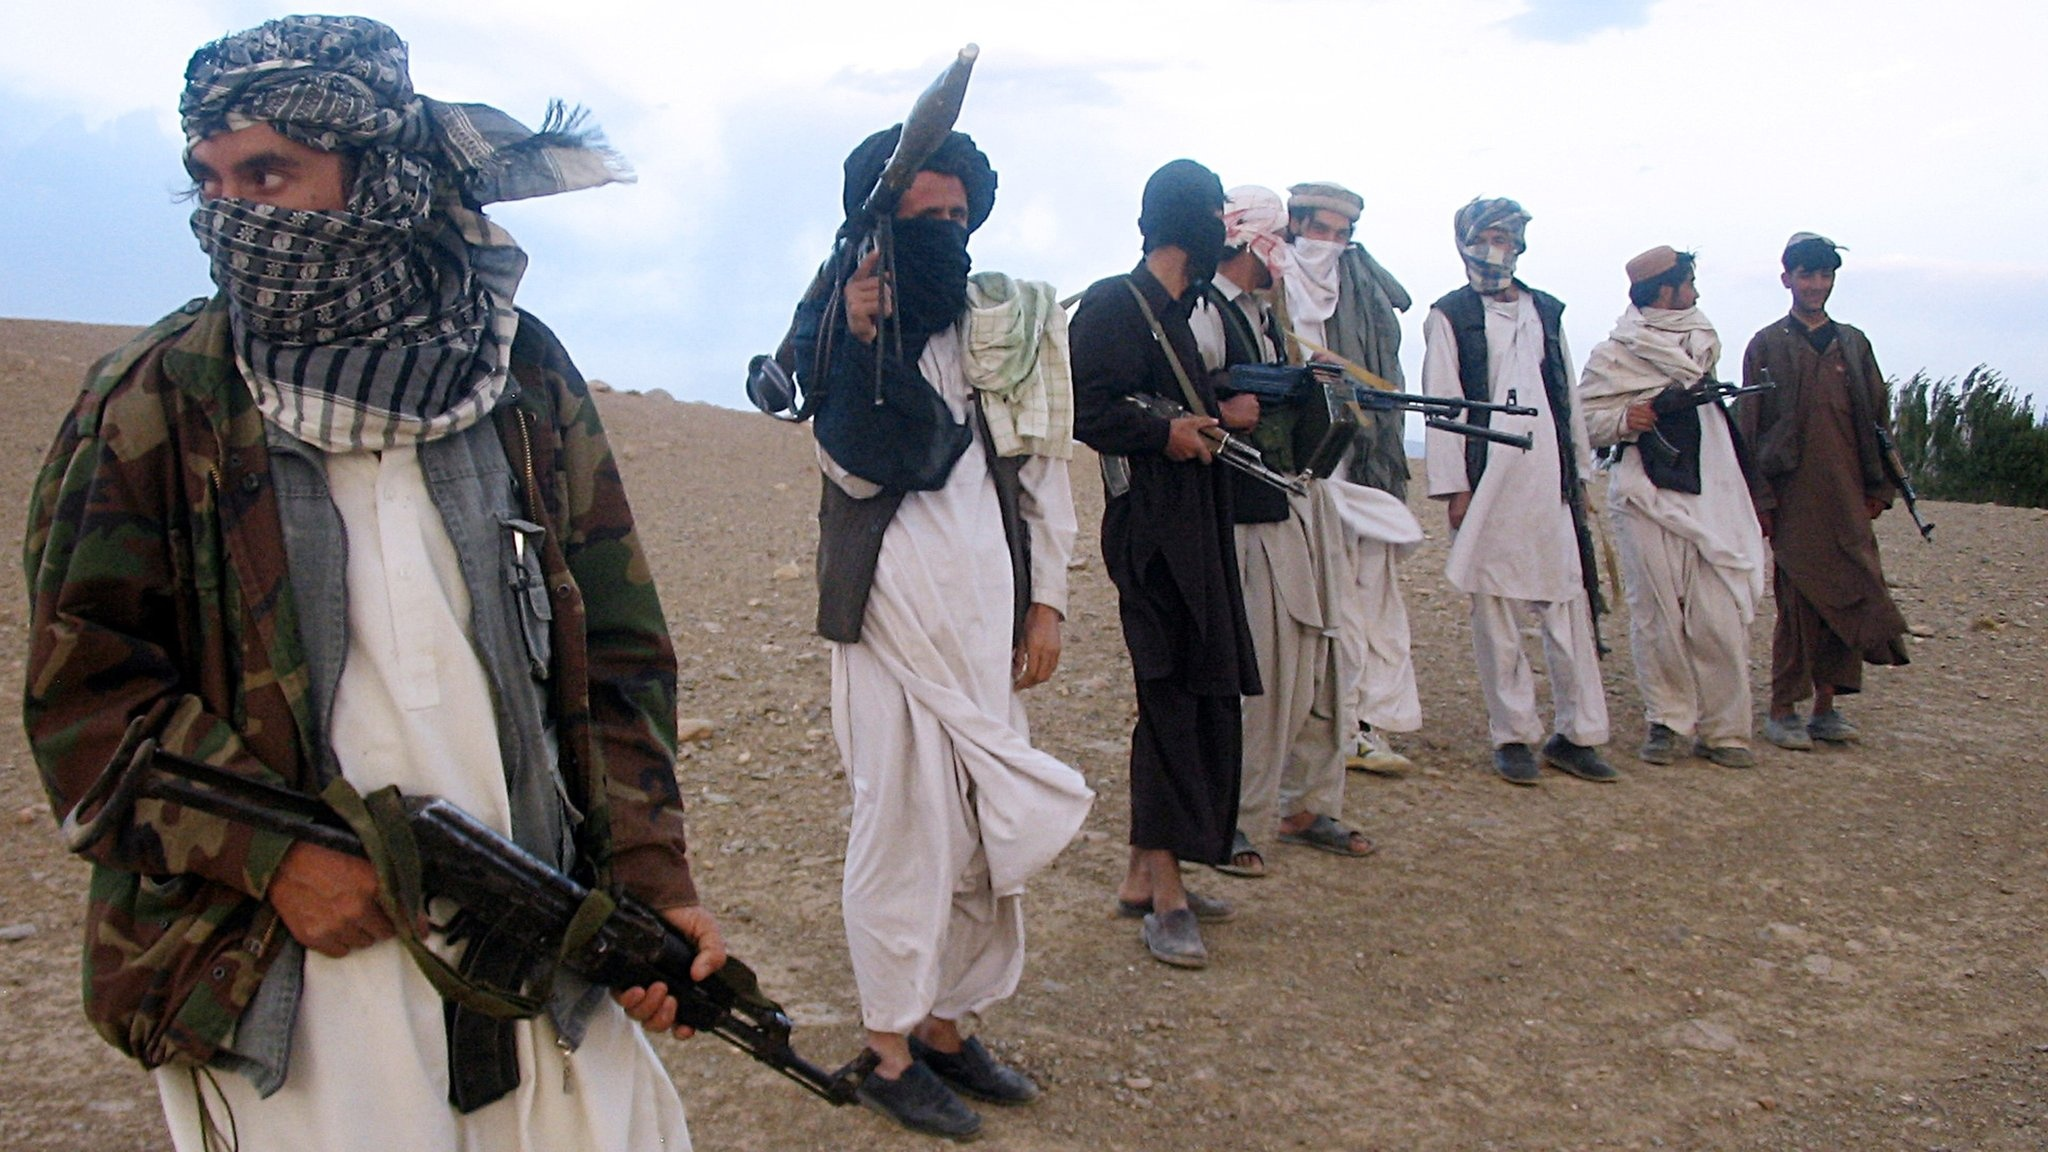

In [5]:
Image(filename='D:/AI/weapon_detection/yolov5/runs/detect/exp10/terrorists2.jpg', width=416)

### 4. Implement SURF-Algorithm to trained YOLOv5

In [15]:
# Load the trained best weight (Load the YOLOv5 model) 
weights = 'D:/AI/weapon_detection/yolov5/runs/train/exp8/weights/last.pt'

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
checkpoint = torch.load(weights, map_location=device)
model = attempt_load(checkpoint, device)

In [ ]:
# Define the SURF detector
min_hessian = 400
surf = cv2.xfeatures2d_SURF.create(hessianThreshold=min_hessian)


In [ ]:
#Define a function to detect weapons using YOLOv5 and SURF
def detect_weapon(image_path, model, surf):
    # Load image
    img = cv2.imread(image_path)

    # Get YOLOv5 predictions
    results = model(img)

    # Convert results to numpy arrays
    pred_boxes = results.xyxy[0].cpu().numpy()
    pred_classes = results.names[results.pred[0].cpu().numpy()[:, -1].astype(np.int)]

    # Draw bounding boxes on image
    for box, cls in zip(pred_boxes, pred_classes):
        x1, y1, x2, y2 = map(int, box[:4])
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
        cv2.putText(img, cls, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # Detect weapons using SURF
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    keypoints, descriptors = surf.detectAndCompute(gray, None)
    img = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display image
    cv2.imshow('image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
# Call the function with the path to the image
image_path = 'path/to/image.jpg'
detect_weapon(image_path, model, surf)